## **Tutorial on Application of Optimizer**

[Boston Data](https://www.kaggle.com/c/boston-housing/overview)

# **Housing Values in Suburbs of Boston**
The ***Price*** variable is the target variable.

Data description
The Boston data frame has 506 rows and 14 columns.

This data frame contains the following columns:

***crim***
per capita crime rate by town.

***zn***
proportion of residential land zoned for lots over 25,000 sq.ft.

***indus***
proportion of non-retail business acres per town.

***chas***
Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).

***nox***
nitrogen oxides concentration (parts per 10 million).

***rm***
average number of rooms per dwelling.

***age***
proportion of owner-occupied units built prior to 1940.

***dis***
weighted mean of distances to five Boston employment centres.

***rad***
index of accessibility to radial highways.

***tax***
full-value property-tax rate per $10,000.

***ptratio***
pupil-teacher ratio by town.

***black***
1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.

***lstat***
lower status of the population (percent).

***Price***
median value of owner-occupied homes in $1000s.

# **Implementing Linear SGD with Mini-Batch**
# In Mini-Batch SGD the parameters are updated after computing the gradient of error with respect to a subset of the training set. 

In [2]:
#Let us take the Boston Housing Dataset from Kaggle as an example.
#First, we will import all the necessary libraries.

import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets import load_boston
from random import seed
from random import randrange
from csv import reader
from math import sqrt
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from sklearn.linear_model import SGDRegressor
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [3]:
#Now, we will load our dataset. Here, X contains the dataset we have and Y contains the label that we need to predict.
X = load_boston().data
Y = load_boston().target

Remember to split your data before scaling to avoid the data leakage problem.

In [4]:
# split the data set into train and test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [5]:
scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
#Creating the DataFrame using pandas.
X_train = pd.DataFrame(data = X_train, columns=load_boston().feature_names)  
X_test = pd.DataFrame(data = X_test, columns=load_boston().feature_names)

In [7]:
print (X_train)

         CRIM        ZN     INDUS  ...   PTRATIO         B     LSTAT
0   -0.207356 -0.499979  1.548016  ...  1.227257  0.424543  3.108073
1   -0.388865  0.346774 -0.589747  ...  0.056963  0.401853 -0.666430
2   -0.335735 -0.499979  1.548016  ...  1.227257  0.398461  0.639367
3   -0.394852  2.463658 -1.265584  ... -1.653466  0.089342 -1.056896
4   -0.391456 -0.499979  2.086394  ...  0.282020  0.204545  0.776596
..        ...       ...       ...  ...       ...       ...       ...
349 -0.368566 -0.499979 -0.529609  ...  0.507076  0.357058 -0.099123
350 -0.392217  1.405216 -1.093761  ... -1.473421  0.349573 -1.353990
351 -0.384504 -0.499979 -0.153031  ... -0.303127  0.396590 -0.302844
352 -0.375118 -0.499979 -0.596907  ... -0.258116  0.375888  0.899677
353 -0.385923 -0.499979 -1.006418  ... -0.843263  0.424543  0.318223

[354 rows x 13 columns]


In [8]:
print (X_test)

         CRIM        ZN     INDUS  ...   PTRATIO         B     LSTAT
0   -0.394543 -0.499979 -1.122398  ... -0.708229  0.170861 -0.721605
1    0.704199 -0.499979  1.005342  ...  0.777144  0.064898 -0.411779
2   -0.388907 -0.499979  0.402530  ... -0.933285  0.387584 -0.274550
3    2.570716 -0.499979  1.005342  ...  0.777144  0.424543  1.036906
4   -0.395835 -0.499979  0.250753  ...  0.101975  0.301737 -0.014239
..        ...       ...       ...  ...       ...       ...       ...
147 -0.394326 -0.499979 -1.274175  ...  0.101975  0.424543 -1.005966
148  0.480593 -0.499979  1.005342  ...  0.777144 -3.086179  1.284484
149  1.612857 -0.499979  1.005342  ...  0.777144  0.424543  2.598769
150 -0.343503 -0.499979 -0.168781  ... -0.033059  0.424543 -1.117730
151 -0.399025 -0.499979 -1.274175  ...  0.101975  0.392029 -1.022943

[152 rows x 13 columns]


In [9]:
print (y_train)

[14.4 24.4 18.1 22.5 20.5 15.2 17.4 13.6  8.7 18.2 35.4 31.7 33.  22.2
 20.4 23.9 25.  12.7 29.1 12.  17.7 27.  20.6 10.2 17.5 19.7 29.8 20.5
 14.9 10.9 19.5 22.7 19.5 24.6 25.  24.5 50.  14.3 11.8 31.  28.7 16.2
 43.5 25.  22.  19.9 22.1 46.  22.9 20.2 43.1 34.6 13.8 24.3 21.5 24.4
 21.2 23.8 26.6 25.1  9.6 19.4 19.4  9.5 14.  26.5 13.8 34.7 16.3 21.7
 17.5 15.6 20.9 21.7 12.7 18.5 23.7 19.3 12.7 21.6 23.2 29.6 21.2 23.8
 17.1 22.  36.5 18.8 21.9 23.1 20.2 17.4 37.  24.1 36.2 15.7 32.2 13.5
 17.9 13.3 11.7 41.7 18.4 13.1 25.  21.2 16.  34.9 25.2 24.8 21.5 23.4
 18.9 10.8 21.  27.5 17.5 13.5 28.7 14.8 19.1 28.6 13.1 19.  11.3 13.3
 22.4 20.1 18.2 22.9 20.6 25.  12.8 34.9 23.7 50.  29.  30.1 22.  15.6
 23.3 30.1 14.3 22.8 50.  20.8  6.3 34.9 32.4 19.9 20.3 17.8 23.1 20.4
 23.2  7.  16.8 46.7 50.  22.9 23.9 21.4 21.7 15.4 15.3 23.1 23.9 19.4
 11.9 17.8 31.5 33.8 20.8 19.8 22.4  5.  24.5 19.4 15.1 18.2 19.3 27.1
 20.7 37.6 11.7 33.4 30.1 21.4 45.4 20.1 20.8 26.4 10.4 21.8 32.  21.7
 18.4 

In [ ]:
print (y_test)

[22.6 50.  23.   8.3 21.2 19.9 20.6 18.7 16.1 18.6  8.8 17.2 14.9 10.5
 50.  29.  23.  33.3 29.4 21.  23.8 19.1 20.4 29.1 19.3 23.1 19.6 19.4
 38.7 18.7 14.6 20.  20.5 20.1 23.6 16.8  5.6 50.  14.5 13.3 23.9 20.
 19.8 13.8 16.5 21.6 20.3 17.  11.8 27.5 15.6 23.1 24.3 42.8 15.6 21.7
 17.1 17.2 15.  21.7 18.6 21.  33.1 31.5 20.1 29.8 15.2 15.  27.5 22.6
 20.  21.4 23.5 31.2 23.7  7.4 48.3 24.4 22.6 18.3 23.3 17.1 27.9 44.8
 50.  23.  21.4 10.2 23.3 23.2 18.9 13.4 21.9 24.8 11.9 24.3 13.8 24.7
 14.1 18.7 28.1 19.8 26.7 21.7 22.  22.9 10.4 21.9 20.6 26.4 41.3 17.2
 27.1 20.4 16.5 24.4  8.4 23.   9.7 50.  30.5 12.3 19.4 21.2 20.3 18.8
 33.4 18.5 19.6 33.2 13.1  7.5 13.6 17.4  8.4 35.4 24.  13.4 26.2  7.2
 13.1 24.5 37.2 25.  24.1 16.6 32.9 36.2 11.   7.2 22.8 28.7]


In [ ]:
#Let’s see how our X_train looks like.
X_train.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.207356,-0.499979,1.548016,-0.263603,0.588213,-1.839367,1.107402,-1.125110,-0.618160,0.206735,1.227257,0.424543,3.108073
1,-0.388865,0.346774,-0.589747,-0.263603,-0.797821,0.327487,-0.367661,0.075090,-0.733637,-1.049493,0.056963,0.401853,-0.666430
2,-0.335735,-0.499979,1.548016,-0.263603,0.588213,0.037907,1.043114,-0.799984,-0.618160,0.206735,1.227257,0.398461,0.639367
3,-0.394852,2.463658,-1.265584,-0.263603,-1.352235,0.052172,-1.746292,1.968937,-0.502683,-0.257013,-1.653466,0.089342,-1.056896
4,-0.391456,-0.499979,2.086394,-0.263603,0.215716,-0.495604,0.853820,-0.811511,-0.849114,-1.254951,0.282020,0.204545,0.776596


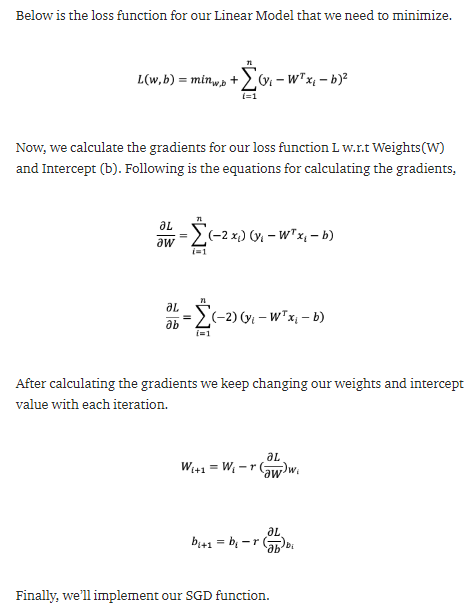

In [ ]:
#define your Optimizer function:::: SGD, minibatchSGD, Adam etc.

#def SGDRegressor(X, y, learning_rate=0.2, n_epochs=1000, k=40):
def SGDRegressor(X, y, learning_rate=0.001, n_epochs=10000, k=10):
    
    w = np.random.randn(1,13)  # Randomly initializing weights
    b = np.random.randn(1,1)   # Random intercept value
    
    epoch=1
    
    while epoch <= n_epochs:
        
        temp = X.sample(k)

        X_tr = temp.iloc[:,0:13].values
        y_tr = temp.iloc[:,-1].values
        
        Lw = w
        Lb = b
        
        loss = 0
        y_pred = []
        sq_loss = []
        
        for i in range(k):
              
            Lw = (-2/k * X_tr[i]) * (y_tr[i] - np.dot(X_tr[i],w.T) - b)
            Lb = (-2/k) * (y_tr[i] - np.dot(X_tr[i],w.T) - b)
            
            w = w - learning_rate * Lw
            b = b - learning_rate * Lb
            
            y_predicted = np.dot(X_tr[i],w.T)
            y_pred.append(y_predicted)
        
        loss = mean_squared_error(y_pred, y_tr)
            
        print("Epoch: %d, Loss: %.3f" %(epoch, loss))
        epoch+=1
        learning_rate = learning_rate/1.02
        
    return w,b

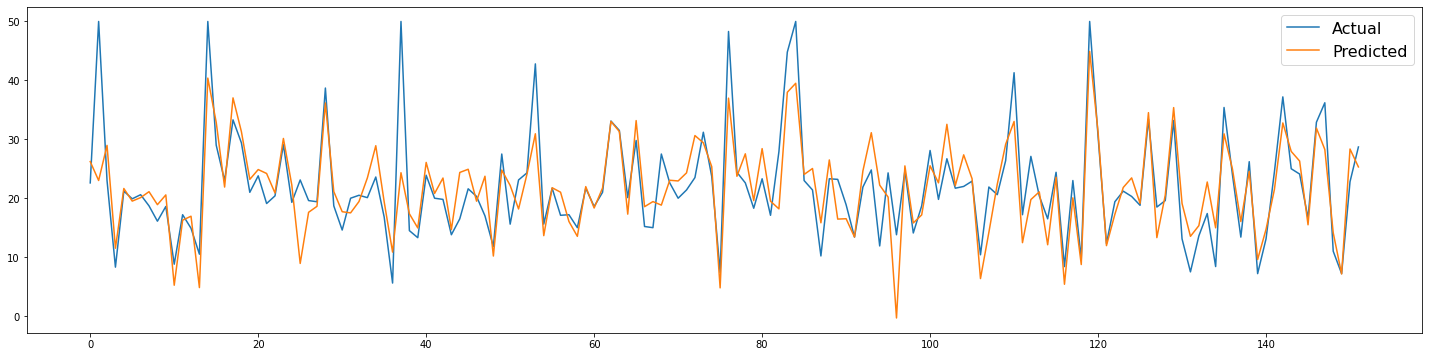

Mean Squared Error : 28.14299401755618


In [ ]:
#Comparing our Predicted Values v/s the Actual Values
#call your optimizer
from sklearn.linear_model import SGDRegressor
clf = SGDRegressor(max_iter=10000, tol=1e-3)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
plt.figure(figsize=(25,6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend(prop={'size': 16})
plt.show()
print('Mean Squared Error :',mean_squared_error(y_test, y_pred))